In [83]:
library(repr)

In [19]:
library(data.table)
library(mltools)
library(ggplot2)
library(ggrepel)

In [47]:
distances.chr22.fn <- "/home/ahryhorzhevska/mpip/bio/code/mpip/dex-stim-human-array/output/data/integrative/dex_cpgs_ilmn_genes_distances/dex_cpgs_ilmn_genes_distances_chr_22.csv"
distances.1mbp.fn  <- '/home/ahryhorzhevska/mpip/bio/code/mpip/dex-stim-human-array/output/data/integrative/dex_cpgs_ilmn_genes_distances_upto_1mbp.csv'
distances.10mbp.fn <- '/home/ahryhorzhevska/mpip/bio/code/mpip/dex-stim-human-array/output/data/integrative/dex_cpgs_ilmn_genes_distances_upto_10mbp.csv'

In [78]:
distances.df <- fread(distances.10mbp.fn)

In [49]:
head(distances.df)

PROBE_ID,CG_CHR,CG_POS,ILMN_ID,GENE_CHR,GENE_START_POS,GENE_END_POS,CG_GENE_DIST
<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>
cg00539386,20,3662512,ILMN_1716421,20,4220630,4249287,558117
cg22177795,20,4982235,ILMN_1716421,20,4220630,4249287,732947
cg06389554,20,3388277,ILMN_1716421,20,4220630,4249287,832352
cg10065530,20,3800567,ILMN_1716421,20,4220630,4249287,420062
cg05837890,20,4702538,ILMN_1716421,20,4220630,4249287,453250
cg05610369,20,3870320,ILMN_1716421,20,4220630,4249287,350309


In [79]:
distances.bins <- data.frame(DistanceInterval = bin_data(distances.df, binCol = "CG_GENE_DIST", 
                                                         bins = c(0, 1, 1001, 2001, 3001, 4001, 5001, 10001,
                                                                  50001, 100001, 150001, 200001, 250001, 300001,
                                                                  400001, 500001, 600001, 700001, 800001, 900001, 1000001, 
                                                                  5000001, 10000001), 
                                                         returnDT = F))
levels(distances.bins$DistanceInterval) <- c("0", "(0; 1]", "(1; 2]", "(2; 3]", "(3; 4]", "(4; 5]", "[5; 10)",
                                             "(10; 50]", "(50; 100]", "(100; 150]", "(150; 200]", "(200; 250]", "[250; 300)",
                                             "(300; 400]", "(400; 500]", "(500; 600]", "(600; 700]", "(700; 800]", "[800; 900)", "[900, 1K)",
                                             "[1K, 5K)", "[5K, 10K)")


In [81]:
distances.bins <- cbind(distances.bins, distances.df)
distances.bins$CG_CHR <- as.factor(distances.bins$CG_CHR)

dim(distances.bins)
dim(distances.df)

[1] 107509798        17

[1] 107509798         8

In [52]:
head(distances.bins)

,DistanceInterval,PROBE_ID,CG_CHR,CG_POS,ILMN_ID,GENE_CHR,GENE_START_POS,GENE_END_POS,CG_GENE_DIST
,<ord>,<chr>,<fct>,<int>,<chr>,<int>,<int>,<int>,<int>
1,(500; 600],cg00539386,20,3662512,ILMN_1716421,20,4220630,4249287,558117
2,(700; 800],cg22177795,20,4982235,ILMN_1716421,20,4220630,4249287,732947
3,[800; 900),cg06389554,20,3388277,ILMN_1716421,20,4220630,4249287,832352
4,(400; 500],cg10065530,20,3800567,ILMN_1716421,20,4220630,4249287,420062
5,(400; 500],cg05837890,20,4702538,ILMN_1716421,20,4220630,4249287,453250
6,(300; 400],cg05610369,20,3870320,ILMN_1716421,20,4220630,4249287,350309


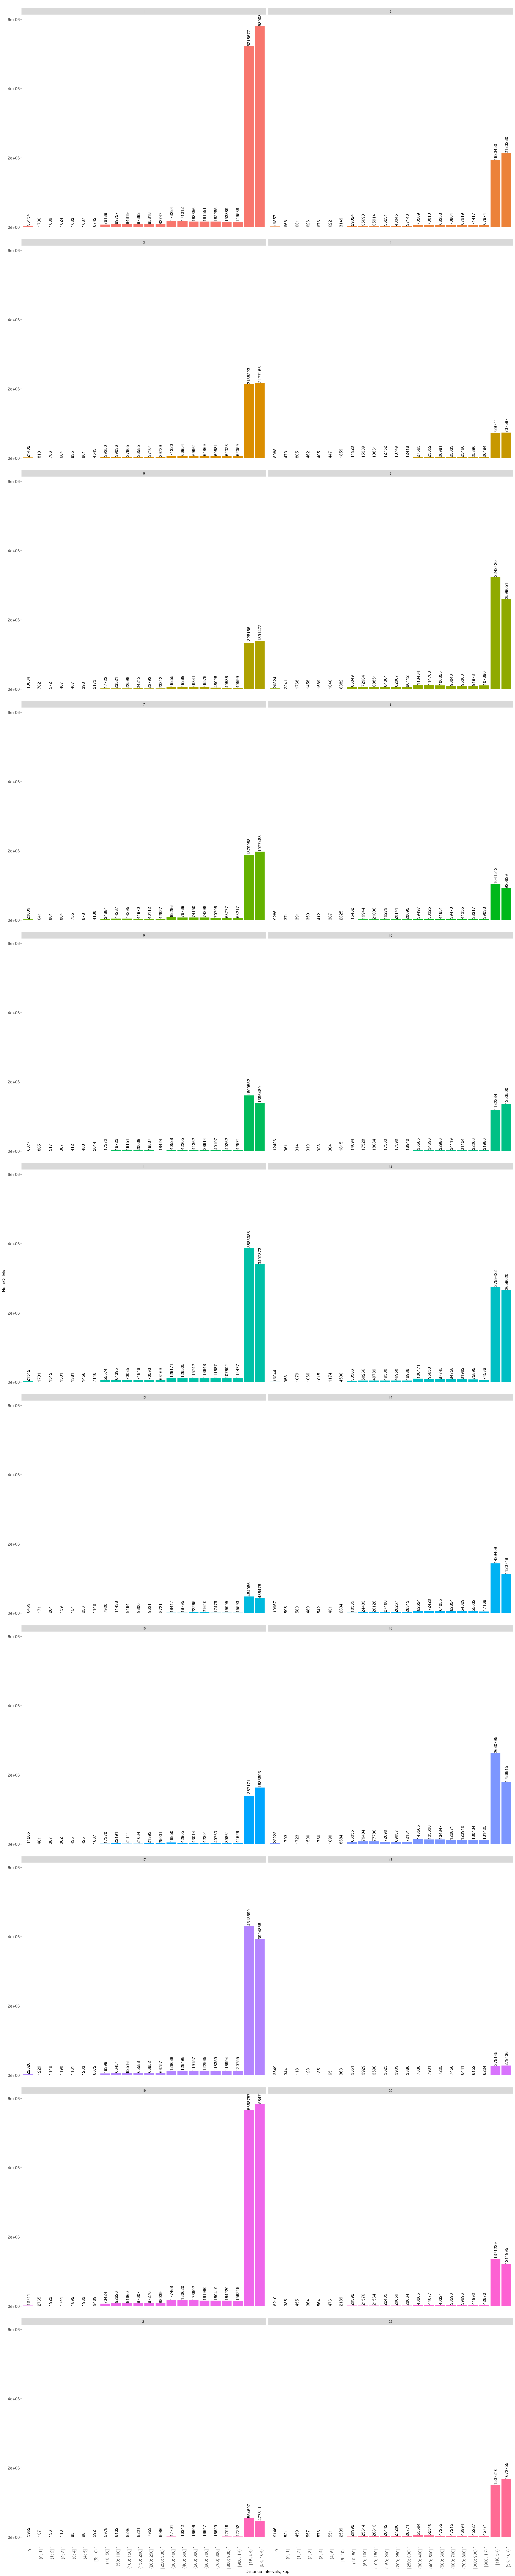

In [96]:
options(repr.plot.width = 20, repr.plot.height = 100)
ggplot(distances.bins[distances.bins$CG_CHR %in% 1:22,], aes(DistanceInterval, fill = CG_CHR)) + 
  geom_bar(position = position_dodge()) +
  geom_text(aes(label = ..count..), 
            stat = "count", vjust = 0.5, hjust = 0, size = 4, angle = 90) +
  facet_wrap(~ CG_CHR, ncol = 2) +
  theme( panel.background = element_blank(),
         plot.title = element_text(size = 12),
         axis.title = element_text(size = 12),
         axis.text.x = element_text(size = 12, angle = 90, hjust = 1), 
         axis.text.y = element_text(size = 12),
         legend.position = "none") +
  labs(title = " ",
       x = "Distance Intervals, kbp",
       y = "No. eQTMs", 
       col = " ")

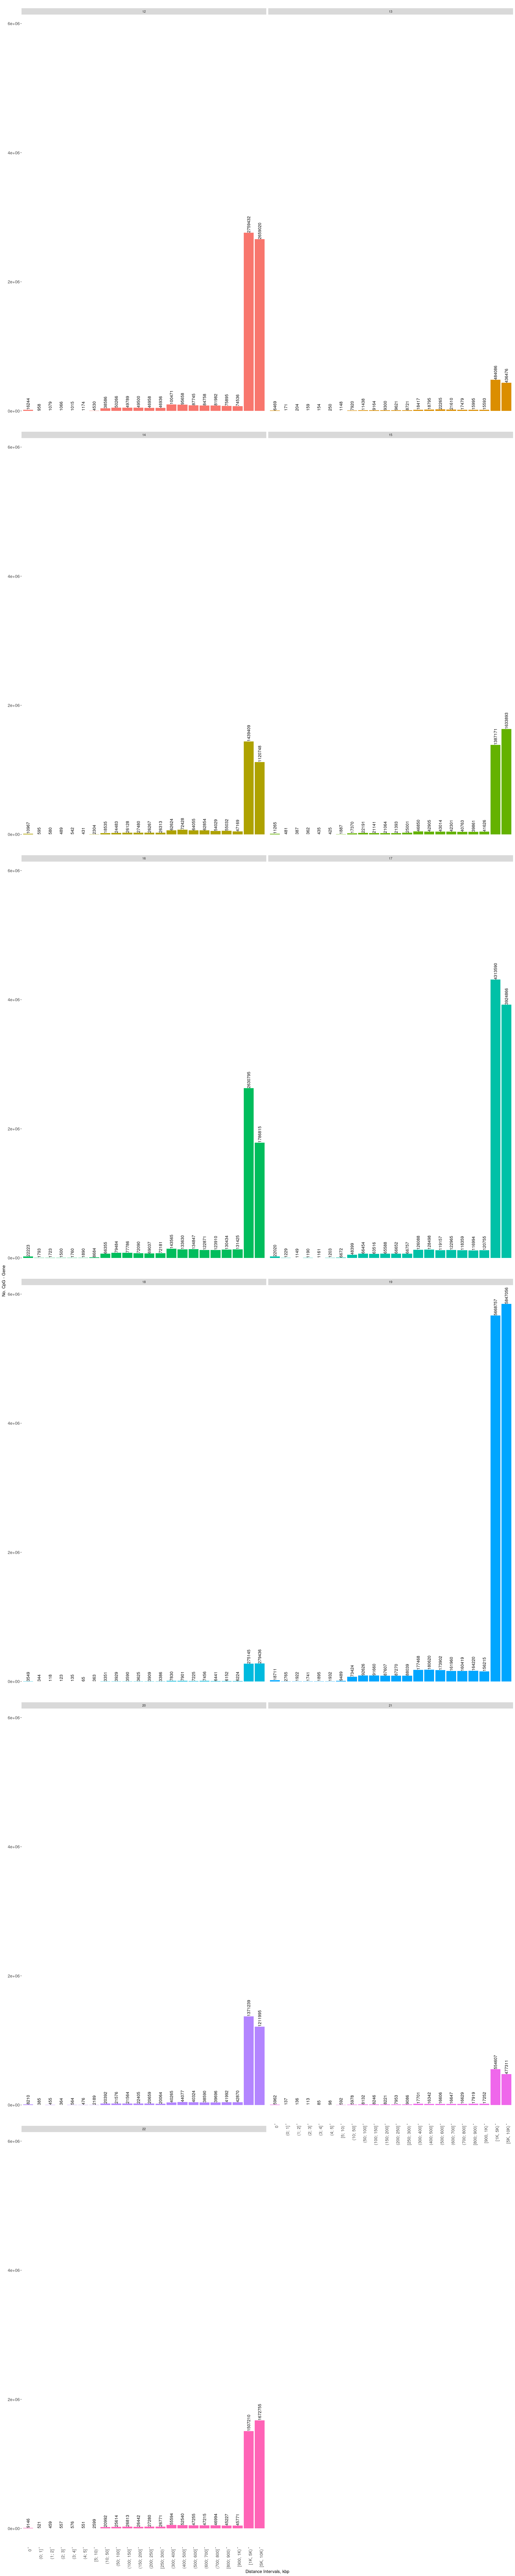

In [95]:
options(repr.plot.width = 20, repr.plot.height = 100)
ggplot(distances.bins[distances.bins$CG_CHR %in% 12:22,], aes(DistanceInterval, fill = CG_CHR)) + 
  geom_bar(position = position_dodge()) +
  geom_text(aes(label = ..count..), 
            stat = "count", vjust = 0.5, hjust = 0, size = 4, angle = 90) +
  facet_wrap(~ CG_CHR, ncol = 2) +
  theme( panel.background = element_blank(),
         plot.title = element_text(size = 12),
         axis.title = element_text(size = 12),
         axis.text.x = element_text(size = 12, angle = 90, hjust = 1), 
         axis.text.y = element_text(size = 12),
         legend.position = "none") +
  labs(title = " ",
       x = "Distance Intervals, kbp",
       y = "No. CpG - Gene", 
       col = " ")

In [54]:
table(is.na(distances.bins$CG_GENE_DIST))


   FALSE 
15988547 

In [85]:
max(distances.df$CG_GENE_DIST)

[1] 10000000